In [8]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../../mathematical_models"))
from mathematical_models.s_on_f import ScalarOnFunctionModel

sys.path.append(os.path.abspath("../../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
# from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../basis"))
from basis.bspline import BSplineBasis
from basis.polynomial import PolynomialBasis
from basis.basis import plot_design
from basis.basis import Basis
from basis.fourier import FourierBasis

### Settings

In [9]:
N = 6 # runs
epochs = 100
refinement_epochs = 10
x_base_1 = BSplineBasis(degree=1, num_basis_functions=10)
b_base_1 = PolynomialBasis(degree=2)
x_base_2 = BSplineBasis(degree=3, num_basis_functions=10)
b_base_2 = PolynomialBasis(degree=2)
bases_pairs = [(x_base_1, b_base_1),
               (x_base_2, b_base_2)]
x_bases = [x_base_1, x_base_2]

s_on_f_model = ScalarOnFunctionModel(bases_pairs=bases_pairs)

### Continuous

In [10]:
optimizer_s_on_f = CordexContinuous(model=s_on_f_model, runs=N)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs, refinement_epochs=refinement_epochs)

100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


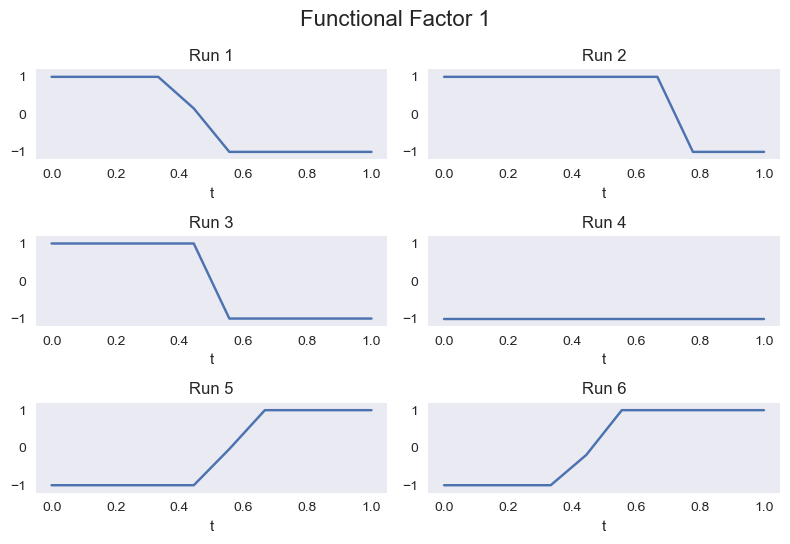

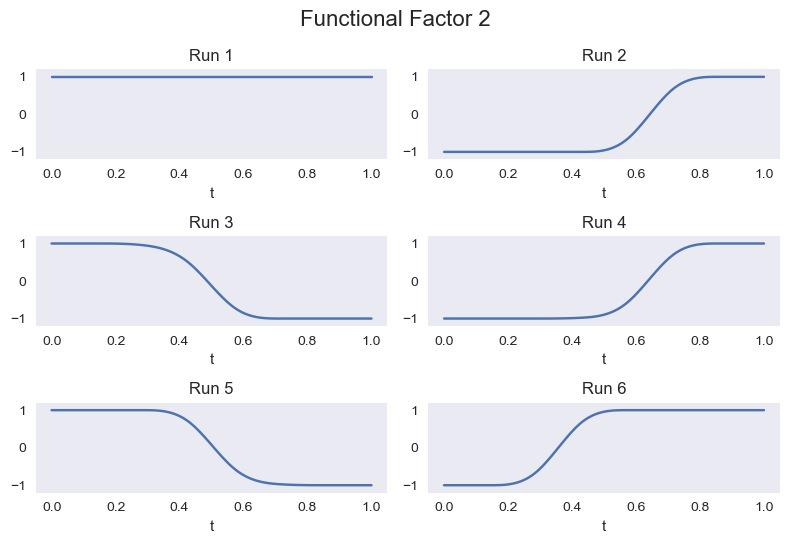

In [11]:
plot_design(best_design_s_on_f, x_bases, N,
            sub_x=3, sub_y=2)